In [8]:
import numpy as np
import mne
import sklearn
import pandas as pd
import glob

In [22]:
# df = pd.read_csv(r'E:\Diss\Paradigm\Participants\Tiffany\Labelled\speaking1_labelled.csv')
# print(df)
path = 'E:\Diss\Paradigm\Participants\Tiffany\Labelled'
csv_files = glob.glob(path + "\speaking*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
speaking   = pd.concat(df_list, ignore_index=True)

In [23]:
speaking

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Channel 15,Channel 16,Label,Mode of Stimulus,Stage
0,41.000000,0,4394.743652,4310.897461,4053.461426,4061.923096,4248.974121,4250.000000,4301.794922,4318.333496,...,3880.000000,4213.589844,4277.948730,4293.846191,4328.077148,4397.179688,4315.128418,Lamp,audio,speaking10
1,41.003906,0,4319.871582,4270.641113,3884.487061,4216.025879,4279.230957,4296.794922,4330.128418,4398.077148,...,4057.820557,4078.333252,4253.461426,4258.077148,4315.128418,4321.282227,4271.794922,Lamp,audio,speaking10
2,41.007812,0,4397.820312,4319.230957,4063.076904,4080.000000,4259.743652,4256.794922,4315.000000,4321.025879,...,3894.102539,4217.563965,4279.230957,4296.410156,4329.487305,4397.436035,4317.307617,Lamp,audio,speaking10
3,41.011719,0,4317.820312,4265.769043,3893.846191,4216.666504,4278.205078,4292.307617,4325.897461,4397.307617,...,4080.641113,4067.307617,4267.563965,4247.051270,4299.487305,4312.948730,4262.692383,Lamp,audio,speaking10
4,41.015625,0,4397.436035,4309.615234,4093.333252,4059.871826,4264.358887,4244.102539,4291.666504,4308.974121,...,3883.974365,4216.538574,4276.025879,4289.102539,4316.922852,4397.948730,4307.179688,Lamp,audio,speaking10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665595,4501.980469,129,4262.948730,4262.051270,4282.436035,4251.025879,4250.512695,4257.563965,4260.769043,4259.358887,...,4271.410156,4277.436035,4254.615234,4247.051270,4249.487305,4259.230957,4258.077148,Clock,text,speaking9
665596,4501.984375,129,4259.102539,4246.025879,4267.948730,4270.000000,4248.974121,4246.666504,4248.846191,4256.794922,...,4273.333496,4245.641113,4246.922852,4250.128418,4251.666504,4257.820312,4246.538574,Clock,text,speaking9
665597,4501.988281,129,4256.666504,4254.230957,4271.666504,4243.974121,4246.922852,4250.512695,4246.538574,4256.282227,...,4266.922852,4262.179688,4241.922852,4246.025879,4246.794922,4258.846191,4256.538574,Clock,text,speaking9
665598,4501.992188,129,4255.512695,4252.307617,4270.000000,4267.307617,4245.256348,4246.153809,4247.051270,4262.051270,...,4280.000000,4247.179688,4252.051270,4259.615234,4243.589844,4256.025879,4257.179688,Clock,text,speaking9


In [24]:
speaking_mne = speaking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])

In [34]:
sfreq = 256
ch_names = list(speaking_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
# montage = mne.channels.DigMontage(ch_names=ch_names)
raw_speaking = mne.io.RawArray(speaking[ch_names].transpose(), info)
# raw_speaking.set_montage(montage)
raw_speaking.info

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=665600
    Range : 0 ... 665599 =      0.000 ...  2599.996 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


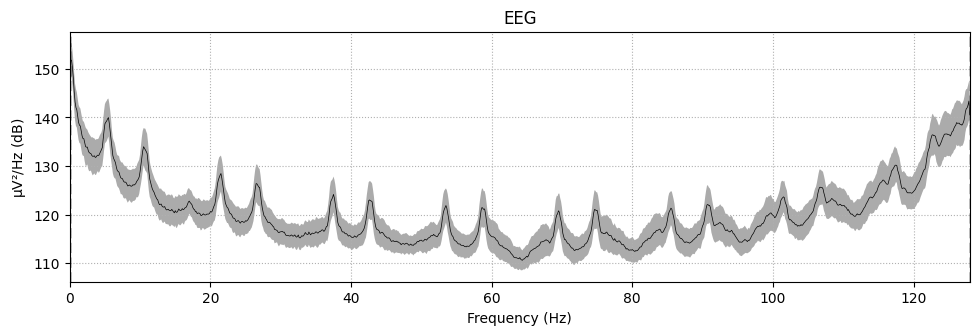

In [38]:
fig = raw_speaking.plot_psd(fmax=128, average=True)

for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

In [42]:
ssp_projectors = raw_speaking.info['projs']
print(ssp_projectors)
raw_speaking.del_proj()

[]


<RawArray | 14 x 665600 (2600.0 s), ~71.1 MB, data loaded>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\ruthwik\AppData\Local\Temp\ipykernel_18580\650591560.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_speaking.plot_psd(fmax=128)


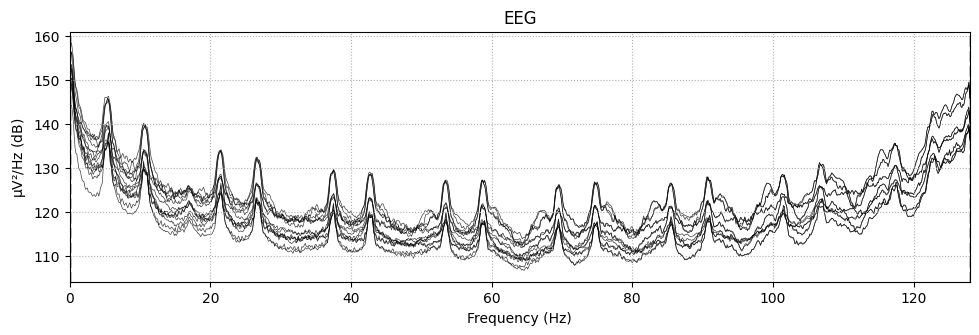

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\ruthwik\AppData\Local\Temp\ipykernel_18580\650591560.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_speaking_filt.plot_psd(fmax=128)


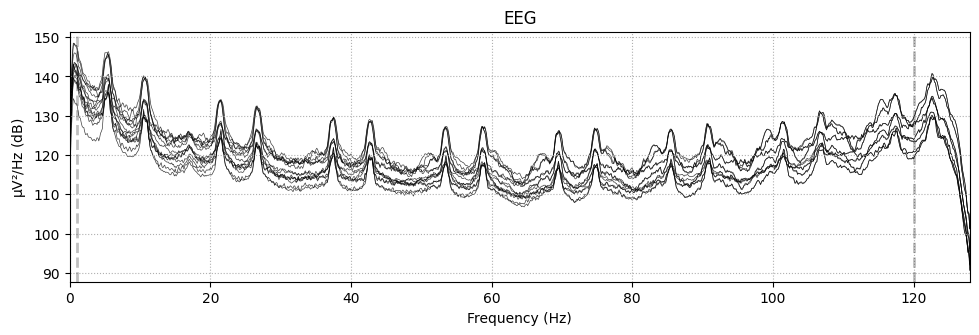

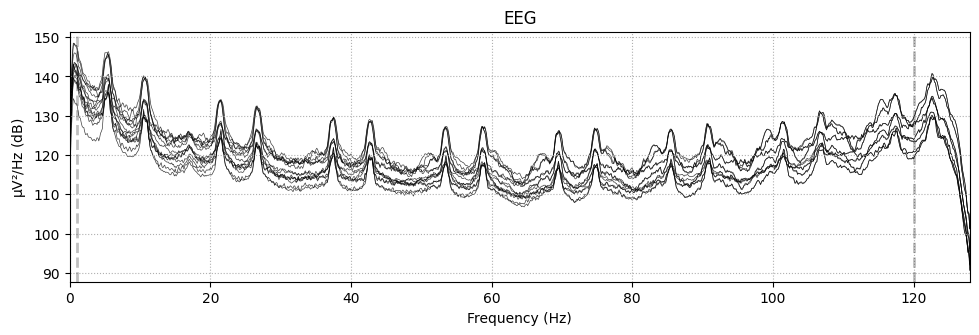

In [44]:
raw_speaking.plot_psd(fmax=128)

low_cut = 1
hi_cut  = 120

raw_speaking_filt = raw_speaking.copy().filter(low_cut, hi_cut)
raw_speaking_filt.plot_psd(fmax=128)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\Users\ruthwik\AppData\Local\Temp\ipykernel_18580\128140431.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_speaking.plot_psd(fmax=128)


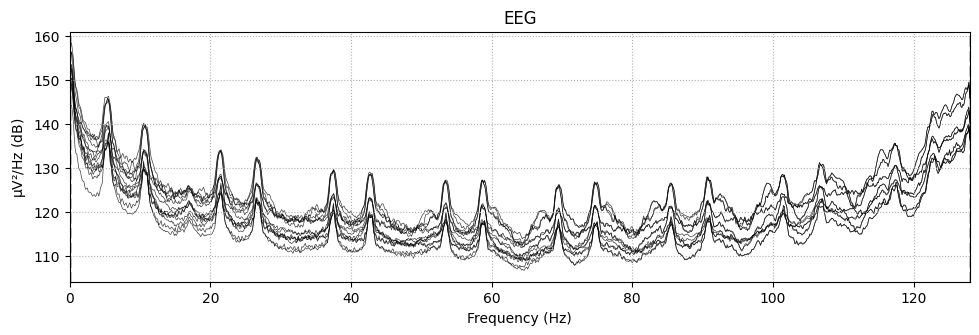

Using matplotlib as 2D backend.


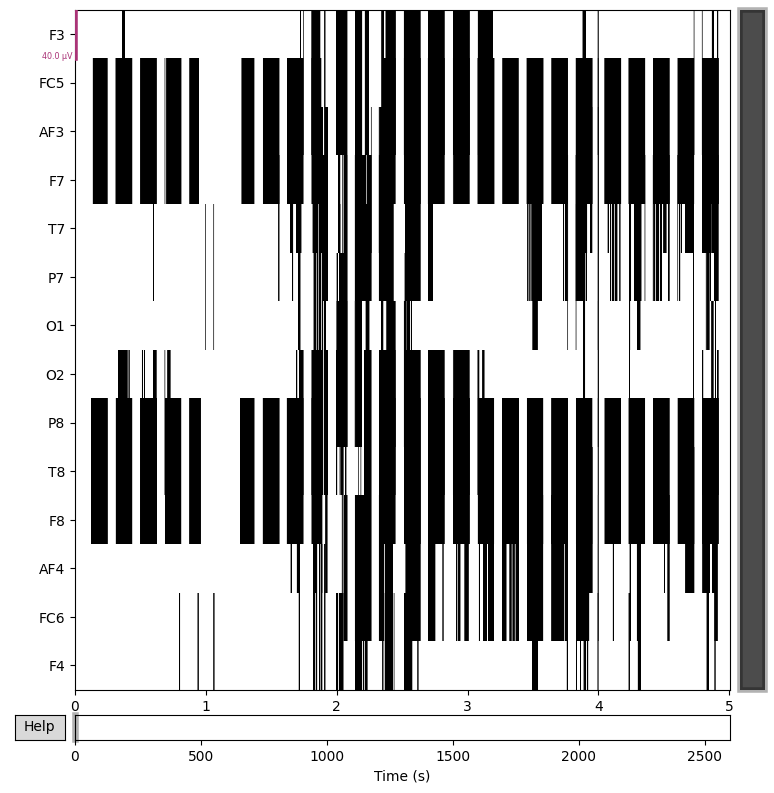

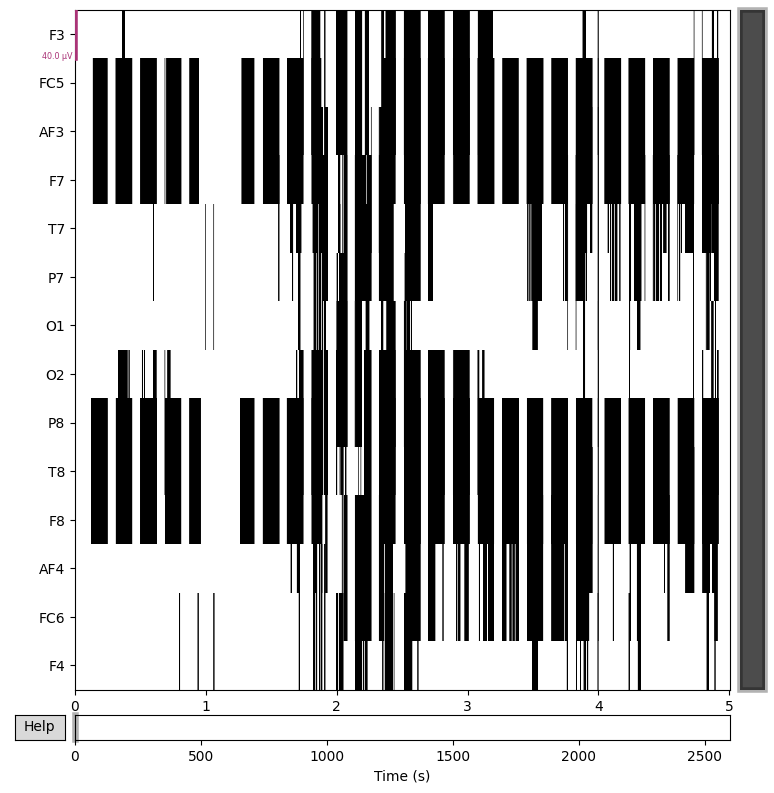

In [47]:
raw_speaking.plot_psd(fmax=128)
raw_speaking.plot(duration=5, n_channels=14)

Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_18580\2980975358.py:6: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_speaking)


Selecting by number: 14 components
Fitting ICA took 6.7s.
    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

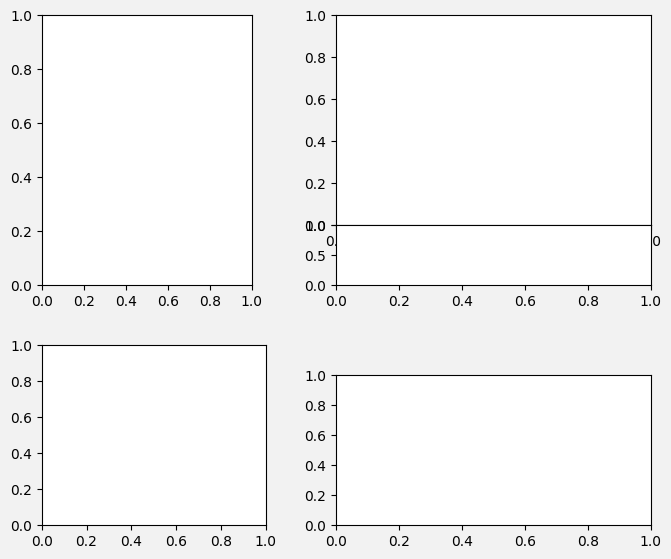

In [48]:
# ica = mne.preprocessing.ICA(random_state=97, max_iter=800)
# ica.fit(raw_speaking_filt)
# ica.exclude = [1]  # details on how we picked these are omitted here
# ica.plot_properties(raw_speaking_filt, picks=ica.exclude)
ica = mne.preprocessing.ICA(n_components=14, random_state=97, max_iter=800)
ica.fit(raw_speaking)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw_speaking, picks=ica.exclude)